<a href="https://colab.research.google.com/github/Nanangk/Rock-Paper-Scissors_Classification_with_CNN/blob/master/Rock_Paper_Scissor_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#download dataset
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-06-16 01:03:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.57MB/s    in 74s     

2020-06-16 01:04:57 (4.14 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
#ekstrak dataset
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [0]:
import os

#create train validation directory name
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

#create train validation directory
os.mkdir(train_dir)
os.mkdir(validation_dir)

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

In [0]:
#train test split for each directory
from sklearn.model_selection import train_test_split

#split directory rock into train data and validation data
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

#split directory paper into train data and validation data
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

#split directory paper into train data and validation data
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [0]:
#create directory name
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [0]:
#create directory
#train
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

#validation
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [0]:
#copy data to new directory
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [0]:
#image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [21]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150,150),
                  batch_size = 4,
                  class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
                  validation_dir,
                  target_size = (150,150),
                  batch_size = 4,
                  class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [46]:
#creat model
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.models import Sequential 

model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), activation='relu', padding='same', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation=Activation(tf.nn.softmax)))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 41472)            

In [0]:
#compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
def scheduler(epoch, lr):
  if epoch < 10:
     return lr
  else:
     return lr * tf.math.exp(-0.1)
  
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [52]:
#fit model
CNN = model.fit(train_generator,
    steps_per_epoch = 14,
    epochs = 200,
    callbacks = [callback],
    validation_data = validation_generator,
    validation_steps = 3,
    verbose = 1)

Epoch 1/200
14/14 [==============================] - 11s 805ms/step - loss: 0.2988 - accuracy: 0.8929 - val_loss: 1.0267 - val_accuracy: 0.7500
Epoch 2/200
14/14 [==============================] - 11s 758ms/step - loss: 0.1920 - accuracy: 0.9643 - val_loss: 0.2817 - val_accuracy: 0.9167
Epoch 3/200
14/14 [==============================] - 11s 761ms/step - loss: 0.4061 - accuracy: 0.8571 - val_loss: 0.2050 - val_accuracy: 1.0000
Epoch 4/200
14/14 [==============================] - 11s 753ms/step - loss: 0.3058 - accuracy: 0.8929 - val_loss: 0.1536 - val_accuracy: 0.8333
Epoch 5/200
14/14 [==============================] - 11s 760ms/step - loss: 0.1799 - accuracy: 0.9286 - val_loss: 0.0374 - val_accuracy: 1.0000
Epoch 6/200
14/14 [==============================] - 11s 762ms/step - loss: 0.2479 - accuracy: 0.9107 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 7/200
14/14 [==============================] - 11s 758ms/step - loss: 0.2489 - accuracy: 0.9286 - val_loss: 1.4763 - val_accuracy:

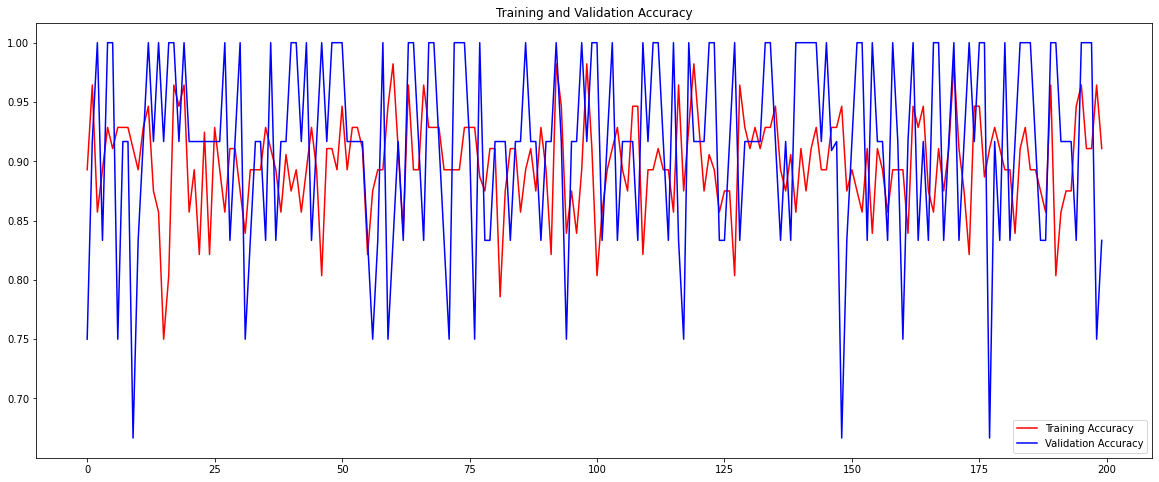

<Figure size 432x288 with 0 Axes>

In [62]:
#accuracy visualization

import matplotlib.pyplot as plt

acc = CNN.history['accuracy']
val_acc = CNN.history['val_accuracy']

epochs = range(len(acc))

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(epochs, acc, 'r', label='Training Accuracy')
ax.plot(epochs, val_acc, 'b', label='Validation Accuracy')
ax.set_title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K (1).png
0a3UtNzl5Ll3sq8K.png
[1. 0. 0.]
Paper


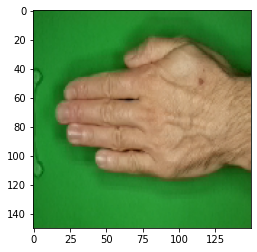

In [69]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  print(classes[0])
  paper = "[1. 0. 0.]"
  rock = "[0. 1. 0.]"
  scissors = "[0. 0. 1.]"
  
  if str(classes[0]) == paper:
   print('Paper')
  elif str(classes[0]) == rock:
   print('Rock')
  else:
   print('Scissors')